<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Brute-force" data-toc-modified-id="Brute-force-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Brute force</a></span></li><li><span><a href="#Using-mousai" data-toc-modified-id="Using-mousai-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Using mousai</a></span></li></ul></div>

According to [wikipedia](https://en.wikipedia.org/wiki/Duffing_equation#Frequency_response), the Duffing frequency response can be described using the following analytical form:

$\begin{align}
\left[ \left( \omega^2-\alpha-\frac{3}{4}\beta z^2 \right)^2 + \left( \delta\omega \right)^2 \right] z^2 = \gamma^2
\end{align}$

# Brute force

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
sns.set_style('white')
sns.set_style('ticks')

xrange = np.arange(0, 2, 1e-3)
yrange = np.arange(0, 14, 1e-3)
w, z = np.meshgrid(xrange,yrange)

alpha=1
delta=0.1
gamma=1

RHS = gamma**2
def LHS(beta):
    return z**2* ( (w**2-alpha-3/4*beta*z**2)**2 +(delta*w)**2 )

def sol(beta):
    return LHS(beta)-RHS

In [2]:
import matplotlib
cmap = matplotlib.cm.get_cmap('coolwarm')

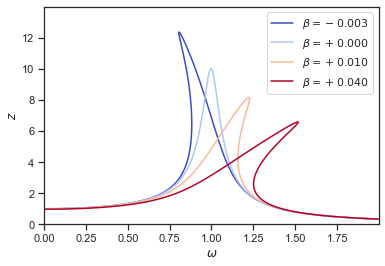

In [3]:
betas = [-0.003,0,0.01,0.04]
myws,myzs = [], []
for i,beta in enumerate(betas):
    cs = plt.contour(w,z,sol(beta), [0],colors=[cmap(i/(len(betas)-1))])
    plt.plot([],[],label=r'$\beta={:+.3f}$'.format(beta),c=cmap(i/(len(betas)-1)))
    # Extracting the data
    p = cs.collections[0].get_paths()[0]
    v = p.vertices
    xx,yy = v[:,0],v[:,1]
#     xx,yy = list(zip(*sorted(zip(xx,yy))))
    myws.append(xx)
    myzs.append(yy)

plt.xlabel(r'$\omega$')
plt.ylabel(r'$z$')
plt.legend()

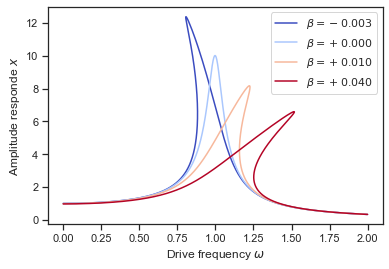

In [4]:
for i,(beta,ww,zz) in enumerate(zip(betas,myws,myzs)):
    plt.plot(ww,zz,label=r'$\beta={:+.3f}$'.format(beta),c=cmap(i/(len(betas)-1)))
#     plt.plot(ww,zz,label=r'$\beta={:+.3f}$'.format(beta),c=cmap(beta/(abs(min(betas)-max(betas)))))
    # for normalized values

plt.xlabel(r'Drive frequency $\omega$')
plt.ylabel(r'Amplitude responde $x$')
plt.legend()

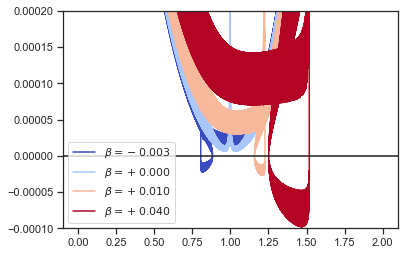

In [5]:
for i,(beta,ww,zz) in enumerate(zip(betas,myws,myzs)):
    plt.plot(ww,np.gradient(ww),label=r'$\beta={:+.3f}$'.format(beta),c=cmap(i/(len(betas)-1)))
plt.axhline(0,c='k')
plt.ylim(-1e-4,2e-4)
# plt.gca().set_ylim(bottom=-1e-4)
plt.legend()

We can use the above gradient to color the regions of instability

# Using mousai

In [6]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import mousai as ms
from scipy import pi, sin

ModuleNotFoundError: No module named 'mousai'

In [ ]:
# Define our function (Python)
def duff_osc_ss(x, params,alpha=1,beta=0.0,gamma=1,delta=0.1):
    omega = params['omega']
    t = params['cur_time']
    xd = np.array([[x[1]],
                   [-alpha*x[0] - beta** x[0]**3 - delta* x[1] + gamma * sin(omega * t)]])
    return xd

In [ ]:
omegal = np.linspace(2.5,0,101)
ampl = sp.zeros_like(omegal)
ampl[:] = np.nan
t, x, e, amps, phases = ms.hb_time(duff_osc_ss, num_variables=2,
                                 omega=2.5, eqform='first_order', num_harmonics=1)
for i, freq in enumerate(omegal):
    # Here we try to obtain solutions, but if they don't work,
    # we ignore them by inserting `np.nan` values.
    x = x - np.average(x)
    try:
        t, x, e, amps, phases = ms.hb_time(duff_osc_ss, x0=x,
                 omega=freq, eqform='first_order', num_harmonics=1)
        ampl[i] = amps[0]
    except:
        ampl[i] = np.nan
    if np.isnan(ampl[i]):
        break

In [ ]:
plt.plot(omega,amp, label='Up sweep')
plt.plot(omegal,ampl, label='Down sweep')
plt.legend()
plt.title('Amplitude versus frequency for Duffing Oscillator')
plt.xlabel('Driving frequency $\\omega$')
plt.ylabel('Amplitude')
plt.grid()